# Lista de Exercícios I

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 29/01/2021

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import scipy.fftpack as sp
import numpy as np
import sys

%matplotlib notebook

## Problema 1

### Letra a)

Vamos começar definindo as constantes e nossa onda quadrada (vamos usar `scipy.signal` para criar a onda quadrada):

In [2]:
N = 1000

def square_wave(n):
    return signal.square(2 * np.pi * n)

Criamos um array vazio para armazenar os valores de nossa onda quadrada:

In [3]:
vals = []

for i in np.linspace(0, 2, N):
    sw = square_wave(i)
    vals.append(sw)

Definimos a nossa função `dft(y)` (disponível no Newman) para calcular a Transformada Discreta de Fourier (DFT):

In [4]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1,complex)
    
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
            
    return c

Agora usamos a DFT:

In [5]:
c = dft(vals)

Como de costume, criamos uma função para melhorar um pouco a estética dos plots:

In [6]:
def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Por fim, vamos ao plot...

<IPython.core.display.Javascript object>


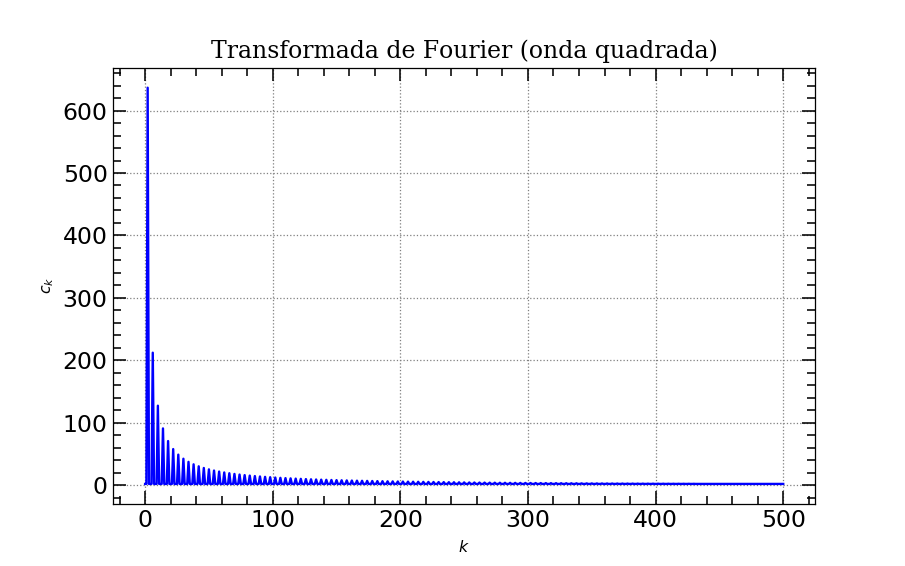

In [7]:
plt.figure(figsize=(8,5))

plt.plot(abs(c), color='blue')
plt.title('Transformada de Fourier (onda quadrada)', family='serif', fontsize=15)
plt.xlabel(r'$k$')
plt.ylabel(r'$c_{k}$')
opt_plot()

### Letra b)

Primeiro definimos a nossa função senoidal modulada:

$$y_{n}=\sin{\Bigg(\frac{\pi n}{N}\Bigg)}\sin{\Bigg(\frac{10\pi n}{N}\Bigg)}$$

In [8]:
def sine_wave(n):
    return np.sin((np.pi*n)/N) * np.sin((10*np.pi*n)/N)

Analogamente ao que foi feito no item anterior:

In [9]:
vals = []

for i in np.linspace(0, 2, N):
    sw2 = sine_wave(i)
    vals.append(sw2)

c = dft(vals)

Agora plotamos a DTF:

<IPython.core.display.Javascript object>


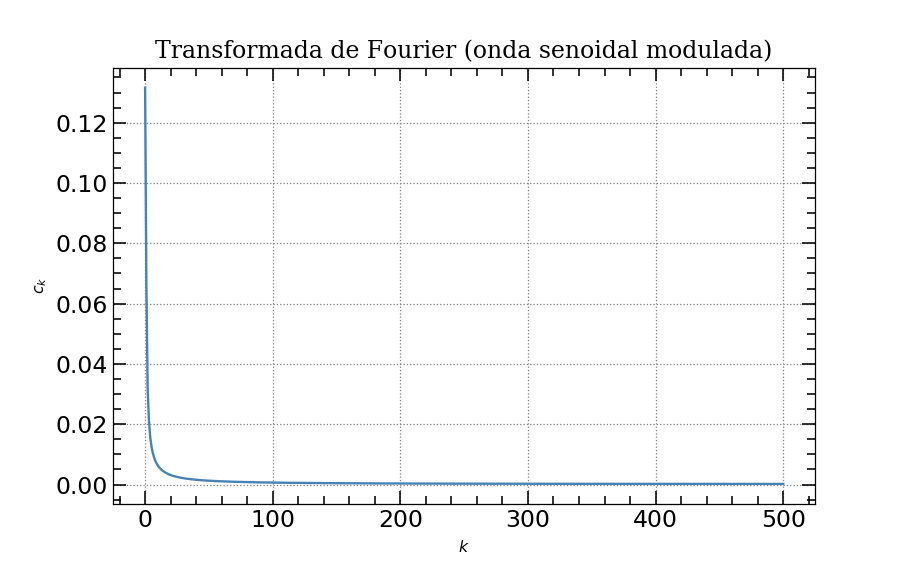

In [10]:
plt.figure(figsize=(8,5))

plt.plot(abs(c), color='steelblue')
plt.title('Transformada de Fourier (onda senoidal modulada)', family='serif', fontsize=15)
plt.xlabel(r'$k$')
plt.ylabel(r'$c_{k}$')
opt_plot()

$\square$

## Problema 2

### Letra a)

Primeiramente, vamos ler os dados presentes no arquivo `sunspots.txt`:

In [11]:
sunspots_data = np.loadtxt('../Dados Auxiliares/sunspots.txt')

time = sunspots_data[:,0]
sunspots = sunspots_data[:,1]

Agora vamos plotar o número de manchas solares em função do tempo:

<IPython.core.display.Javascript object>


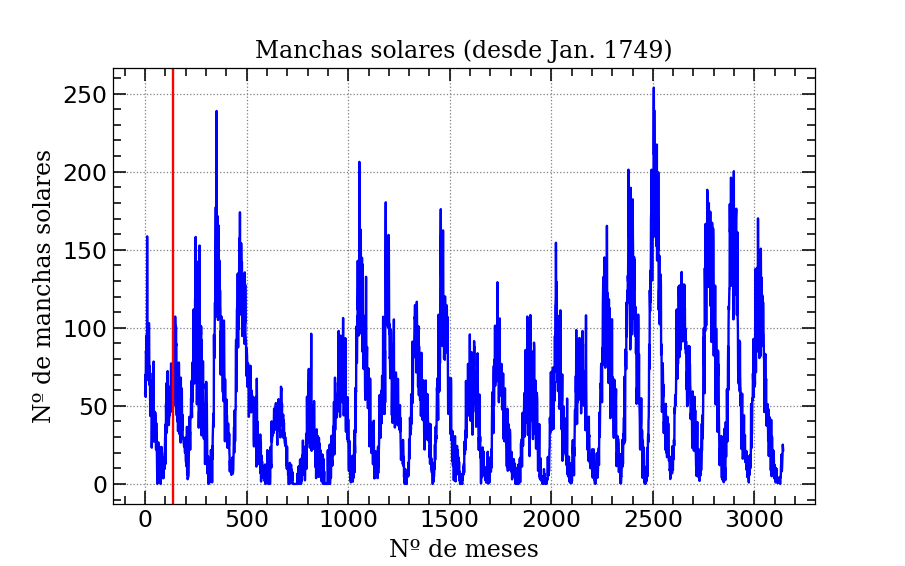

In [12]:
plt.figure(figsize=(8,5))

plt.plot(time, sunspots, color='blue')
plt.axvline(136, color = 'red')
plt.title('Manchas solares (desde Jan. 1749)', family='serif', fontsize=15)
plt.xlabel(r'Nº de meses', family='serif', fontsize=15)
plt.ylabel(r'Nº de manchas solares', family='serif', fontsize=15)
opt_plot()

Observando-se o gráfico acima, podemos estimar o ciclo de flutuações como sendo em 136 meses.

### Letra b)

Começamos calculando a DFT dos dados:

In [13]:
fourier_data = dft(sunspots)

Agora definimos a função que irá calcular o *espectro de potências* ($|c_{k}|^{2}$):

In [14]:
def mag_squared(a):
    return abs(a)**2

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


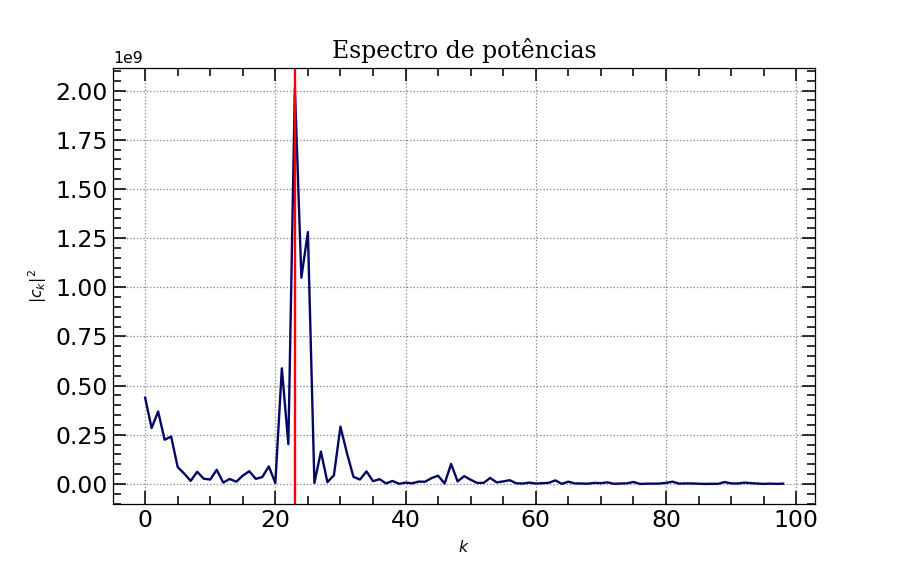

In [15]:
plt.figure(figsize=(8,5))

plt.plot(list(map(mag_squared, fourier_data))[1 : 100], color = 'xkcd:darkblue')
plt.axvline(23, color = 'red')
plt.title('Espectro de potências', family='serif', fontsize=15)
plt.xlabel(r'$k$')
plt.ylabel(r'$|c_{k}|^{2}$')
opt_plot()

Note que temos um pico em 23.

### Letra c)

Pelo gráfico do item anterior, podemos claramente ver um pico em 23, ou seja, $k=23$. Levando em conta o fator de normalização $N$, podemos obter o período da seguinte forma:

$$\boxed{L=\frac{N}{k}=\frac{3143}{23}\approxeq136\text{ }\text{meses}\approxeq11\text{ }\text{anos}}$$

$\blacksquare$

Note que tal resultado concorda o gráfico de manchas realizado no **item a)** e com o espectro de potências realizado no **item b)**.

$\square$

## Problema 3

### Letra a)

Primeiramente, vamos ler os dados contidos nos arquivos `piano.txt` e `trumpet.txt`, respectivamente:

In [16]:
piano_data = np.loadtxt('../Dados Auxiliares/piano.txt')
trumpet_data = np.loadtxt('../Dados Auxiliares/trumpet.txt')

Agora calculamos a Transformada Rápida de Fourier (FFT):

In [17]:
pc = abs(np.fft.rfft(piano_data))
tc = abs(np.fft.rfft(trumpet_data))

Agora vamos aos plots:

<IPython.core.display.Javascript object>


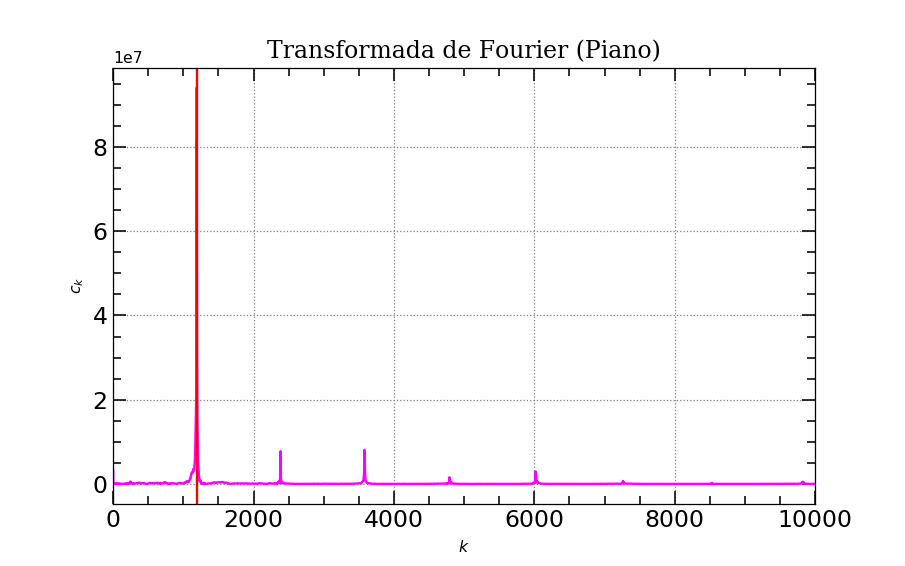

<IPython.core.display.Javascript object>


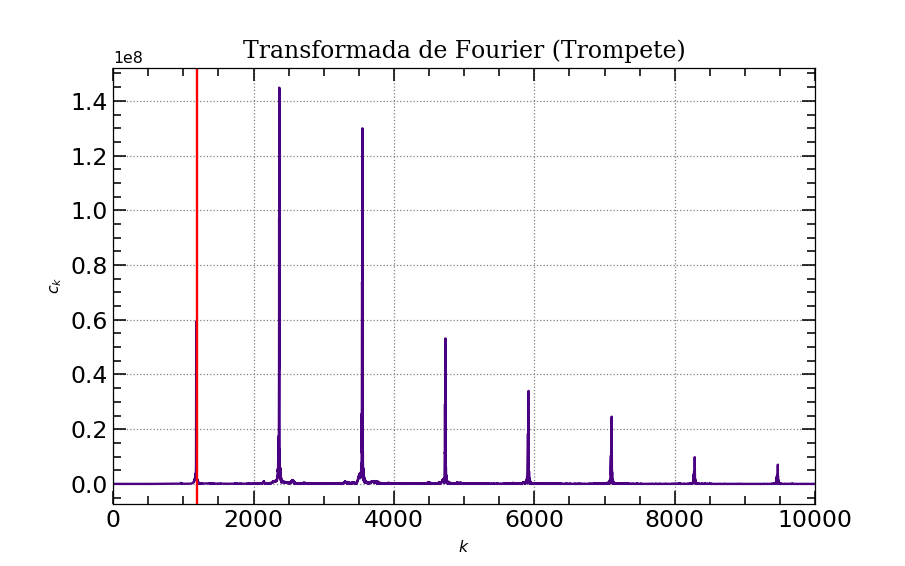

In [18]:
plt.figure(figsize=(8,5))

plt.plot(pc, color='magenta')
plt.axvline(1190, color = 'red')
plt.title('Transformada de Fourier (Piano)', family='serif', fontsize=15)
plt.xlabel(r'$k$')
plt.xlim(0, 10000)
plt.ylabel(r'$c_{k}$')
opt_plot()

plt.figure(figsize=(8,5))

plt.plot(tc, color='indigo')
plt.axvline(1190, color = 'red')
plt.title('Transformada de Fourier (Trompete)', family='serif', fontsize=15)
plt.xlabel(r'$k$')
plt.xlim(0, 10000)
plt.ylabel(r'$c_{k}$')
opt_plot()

A partir dessas transformadas de Fourier, podemos concluir que os sons (que na verdade são os tons) de um piano e trompete serão muito diferentes (o que definitivamente sabemos ser verdade).

### Letra b)

Desejamos encontrar o valor de $k$ para o primeiro pico de cada gráfico. Pelos gráficos anteriores podemos ver que o pico está em $k=1190$, portanto:

In [19]:
k_peak = 1190

Então, para encontrar a nota que eles estão tocando, basta multiplicarmos esse valor de $k$ pelas amostras por segundo sobre o número total de amostras:

In [20]:
note = k_peak * 44100 / 100000

print('A nota que eles estão tocando está em', note, '[Hz], que é aproximadamente 2 vezes a frequência do '
      'C médio, que por sua vez é de 261 [Hz].')

A nota que eles estão tocando está em 524.79 [Hz], que é aproximadamente 2 vezes a frequência do C médio, que por sua vez é de 261 [Hz].


Com base no resultado acima, é mais provável que ambos os intrumentos estejam tocando a nota C aguda, ou seja, C5.

$\square$

## Problema 4

### Letra a)

Primeiramente, vamos ler os dados disponíveis em `dow.txt`:

In [21]:
data = np.loadtxt('../Dados Auxiliares/dow.txt')

Agora vamos plotar dos dados:

<IPython.core.display.Javascript object>


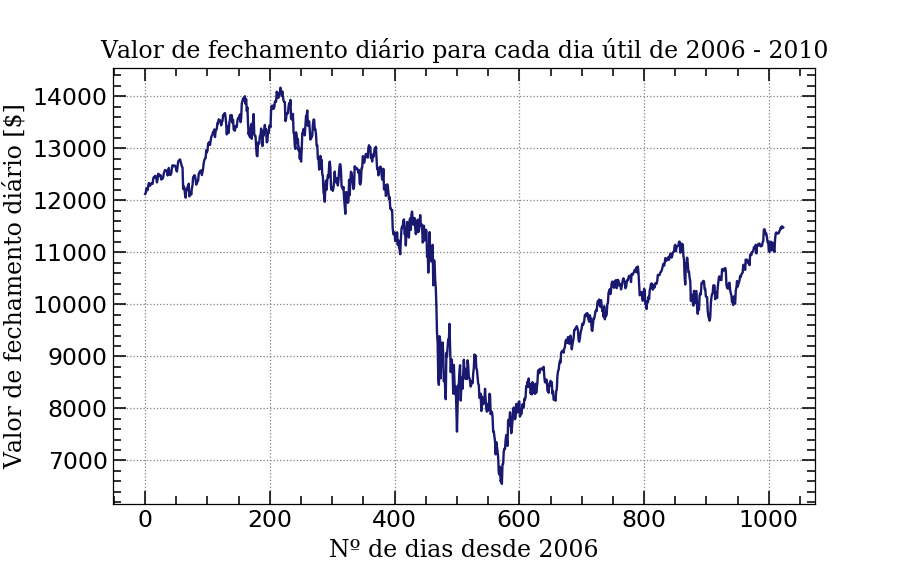

In [22]:
plt.figure(figsize=(8,5))

plt.plot(data, color='midnightblue')
plt.title('Valor de fechamento diário para cada dia útil de 2006 - 2010', family='serif', fontsize=15)
plt.xlabel('Nº de dias desde 2006', family='serif', fontsize=15)
plt.ylabel('Valor de fechamento diário [$]', family='serif', fontsize=15)
opt_plot()

### Letra b)

Vamos agora calcular a DFT dos dados:

In [23]:
c = np.fft.rfft(data)

### Letra c)

Definimos todos, exceto os primeiros 10% dos elementos desta matriz obtida no item anterior para zero:

In [24]:
first_10 = int(0.1*len(c))

for i in range(first_10, len(c), 1):
    c[i] = 0

### Letra d)

Vamos agora calcular a Transformada Inversa de Fourier da matriz acima:

In [25]:
ic = np.fft.irfft(c)

Agora vamos plotar o resultado:

<IPython.core.display.Javascript object>


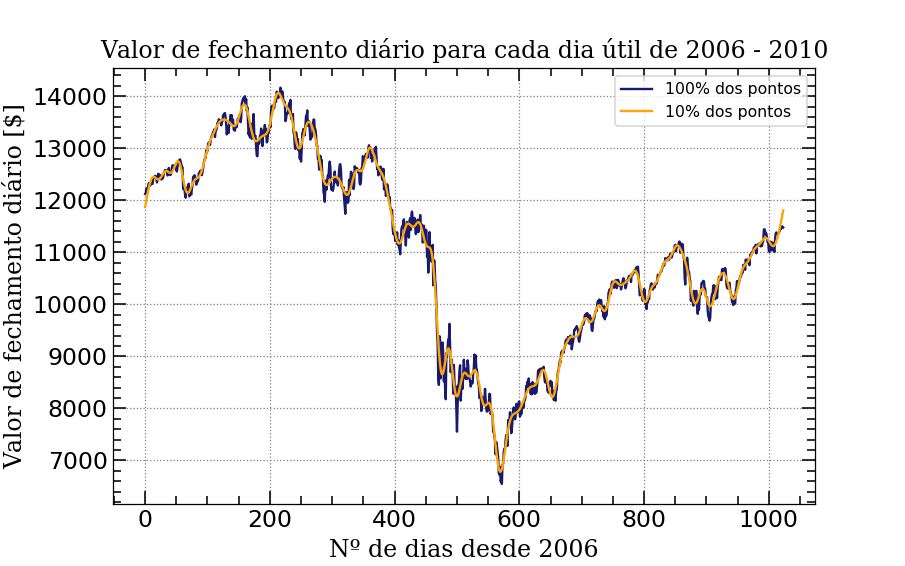

In [26]:
plt.figure(figsize=(8,5))

plt.plot(data, color='midnightblue', linewidth='1.5', label='100% dos pontos')
plt.plot(ic, color='orange', label='10% dos pontos')
plt.title('Valor de fechamento diário para cada dia útil de 2006 - 2010', family='serif', fontsize=15)
plt.xlabel('Nº de dias desde 2006', family='serif', fontsize=15)
plt.ylabel('Valor de fechamento diário [$]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Quando definimos esses coeficientes como zero, a linha aparenta ser menos barulhenta, ou seja, a eliminação do ruído ocasiona a suavização da linha.

### Letra e)

Vamos realizar o mesmo processo feito anteriormente mas vamos manter apenas 2% dos coeficientes como sendo não nulos:

In [27]:
c2 = np.fft.rfft(data)

first_2 = int(0.02 * len(c2))
for i in range(first_2, len(c2), 1):
    c2[i] = 0
    
ic2 = np.fft.irfft(c2)

Agora vamos novamente plotar os dados:

<IPython.core.display.Javascript object>


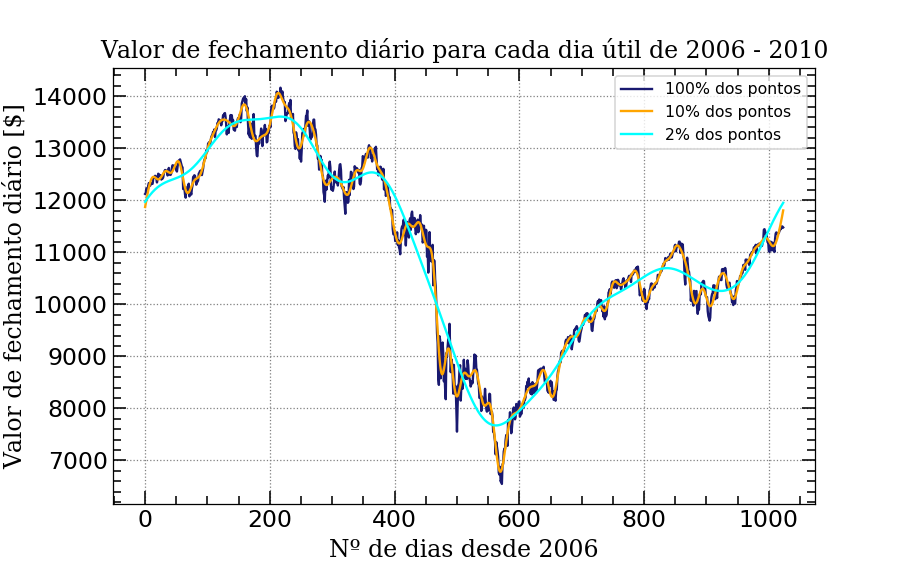

In [28]:
plt.figure(figsize=(8,5))

plt.plot(data, color='midnightblue', linewidth='1.5', label='100% dos pontos')
plt.plot(ic, color='orange', label='10% dos pontos')
plt.plot(ic2, color='cyan', label='2% dos pontos')
plt.title('Valor de fechamento diário para cada dia útil de 2006 - 2010', family='serif', fontsize=15)
plt.xlabel('Nº de dias desde 2006', family='serif', fontsize=15)
plt.ylabel('Valor de fechamento diário [$]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

$\square$

## Problema 5

Vamos começar definindo a onda quadrada exposta no enunciado com amplitude 1 e frequência de 1 Hz:

In [29]:
def square_wave(t):
    if np.floor(2*t)%2 == 0:
        return 1
    else:
        return -1

Agora definimos o número de pontos de amostra em um ciclo e em seguida vamos calcular a DFT da nossa matriz e realizaremos manipulações semelhantes as que foram feitas no item anterior. Nesse caso, vamos ajustar os coeficientes de Fourier para zero, exceto os 10 primeiros:

In [30]:
N = 1000

sample_points = np.linspace(0, 1, N)
square_wave_samples = np.array(list(map(square_wave, sample_points)), float)
square_wave_fourier = np.fft.rfft(square_wave_samples)
first_10_coefficients = np.zeros(len(square_wave_fourier), float)
first_10_coefficients[0 : 9] = np.copy(square_wave_fourier[0 : 9])
compressed_square_wave = np.fft.irfft(first_10_coefficients)

c:\users\gabriel wendell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


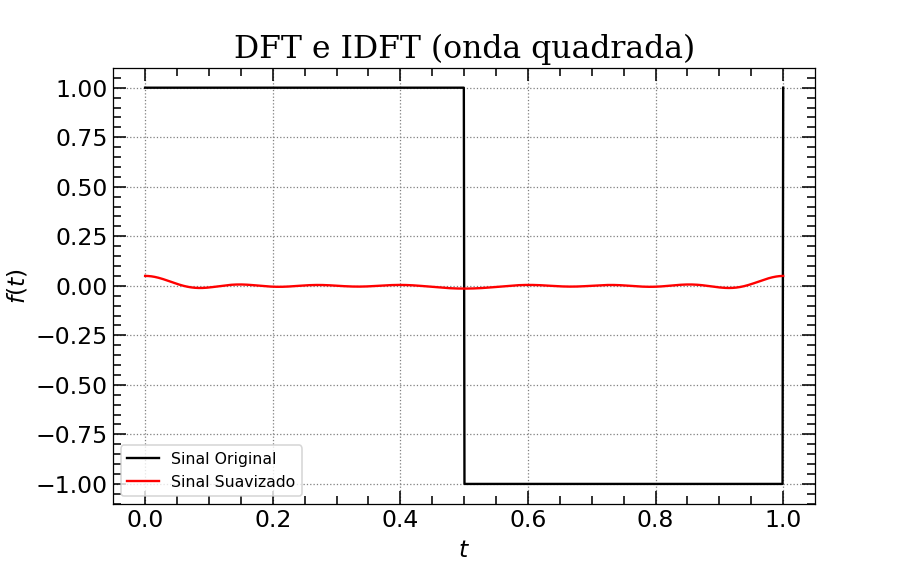

In [31]:
plt.figure(figsize=(8,5))

plt.plot(sample_points, square_wave_samples, color='black', label=r'Sinal Original')
plt.plot(sample_points, compressed_square_wave, color='red', label='Sinal Suavizado')
plt.title('DFT e IDFT (onda quadrada)', family='serif', fontsize=20)
plt.xlabel(r'$t$', family='serif', fontsize=15)
plt.ylabel(r'$f(t)$', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Analisando o gráfico acima, nota-se que descartar muitos modos de alta frequência nos deixa com oscilações de baixa frequência e uma aproximação cada vez pior.

$\square$

## Problema 6

### Letra a)

Primeiramente, vamos ler os dados presentes no arquivo `dow2.txt`:

In [32]:
dow2 = np.loadtxt('../Dados Auxiliares/dow2.txt')

Agora vamos plotar esses dados:

<IPython.core.display.Javascript object>


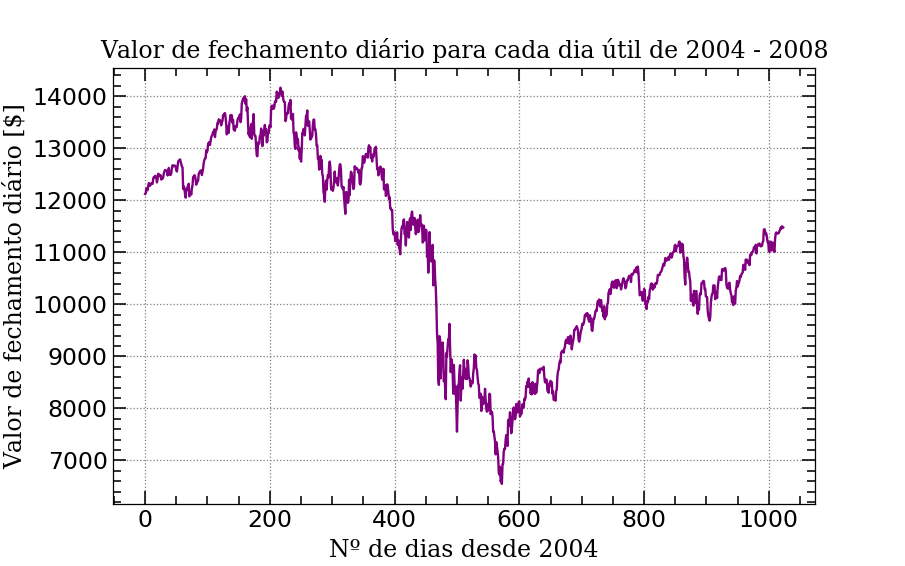

In [33]:
plt.figure(figsize=(8,5))

plt.plot(data, color='purple')
plt.title('Valor de fechamento diário para cada dia útil de 2004 - 2008', family='serif', fontsize=15)
plt.xlabel('Nº de dias desde 2004', family='serif', fontsize=15)
plt.ylabel('Valor de fechamento diário [$]', family='serif', fontsize=15)
opt_plot()

Agora vamos usar a DFT:

In [34]:
dow2_fourier = np.fft.rfft(dow2)

N = len(dow2_fourier)

first_2_percent = np.zeros(N, float)
first_2_percent[0 : int(N/50)] = np.copy(dow2_fourier[0 : int(N/50)])
smoothed_dow2 = np.fft.irfft(first_2_percent)

c:\users\gabriel wendell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


Agora vamos plotar os dados após o tratamento com a DFT:

<IPython.core.display.Javascript object>


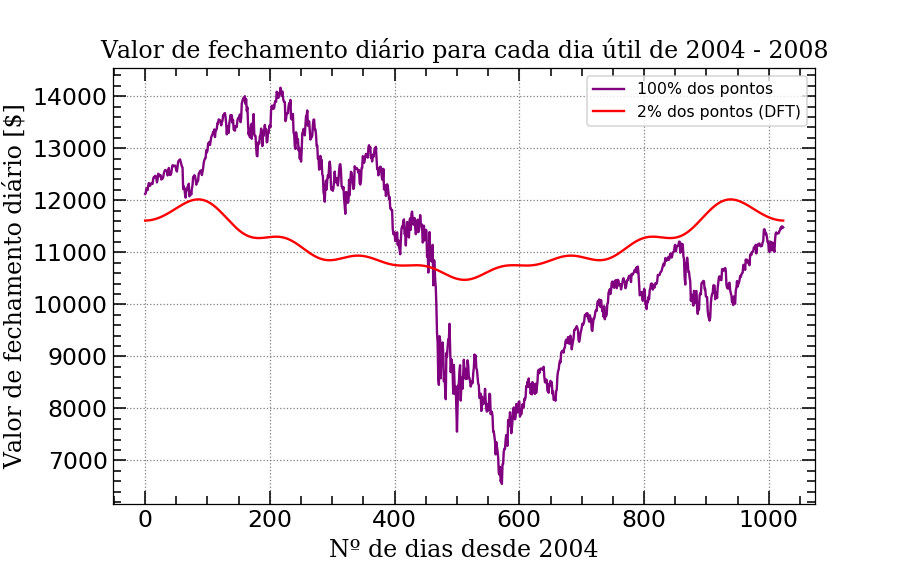

In [35]:
plt.figure(figsize=(8,5))

plt.plot(data, color='purple', label='100% dos pontos')
plt.plot(smoothed_dow2, color='red', label='2% dos pontos (DFT)')
plt.title('Valor de fechamento diário para cada dia útil de 2004 - 2008', family='serif', fontsize=15)
plt.xlabel('Nº de dias desde 2004', family='serif', fontsize=15)
plt.ylabel('Valor de fechamento diário [$]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

### Letra b)

Vamos usar agora a Transformada Discreta do Cosseno (DCT):

In [36]:
dow2_cos = sp.dct(dow2)

n = len(dow2_cos)

first_cos_2_percent = np.zeros(n, float)
first_cos_2_percent[0 : int(n/50)] = np.copy(dow2_cos[0 : int(n/50)])
smoothed_cos_dow2 = sp.idct(first_cos_2_percent)/(2*n)

**OBS**: O fator $\frac{1}{2n}$ é necessário para a normalização!

Por fim, vamos plotar os dados com todos os dados:

<IPython.core.display.Javascript object>


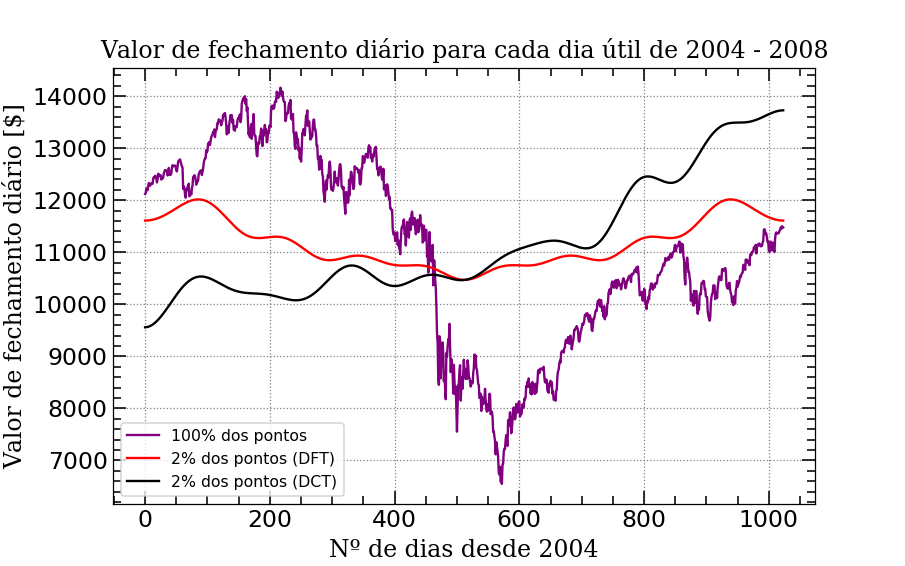

In [37]:
plt.figure(figsize=(8,5))

plt.plot(data, color='purple', label='100% dos pontos')
plt.plot(smoothed_dow2, color='red', label='2% dos pontos (DFT)')
plt.plot(smoothed_cos_dow2, color='black', label='2% dos pontos (DCT)')
plt.title('Valor de fechamento diário para cada dia útil de 2004 - 2008', family='serif', fontsize=15)
plt.xlabel('Nº de dias desde 2004', family='serif', fontsize=15)
plt.ylabel('Valor de fechamento diário [$]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

$\square$